### Load logs

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
# Base LR consistent throughout 0.001
name_map =  {
    "cnn_base_v1_epochs=50_lr=0.001.": "Baseline CNN (50ep)",
    "cnn_dataAug_v1_epochs=50_lr=0.001.": "Data Aug Only (50ep)",
    "cnn_dataAug_dropoutfcl=0.4_v1_epochs=50_lr=0.001.": "Data Aug + FCL Dropout (50ep)",
    "cnn_dataAug_dropoutfcl=0.4_dropoutconv=0.1_v1_epochs=100_lr=0.001.": "Data Aug + FCL&CONV Dropout (100ep)",
    "cnn_dataAug_lrScheduling_dropoutfcl=0.4_dropoutconv=0.1_v1_epochs=50_lr=0.001.": "Data Aug + Dropout + LR Sched (50ep)",
    "cnn_dataAug_lrScheduling_dropoutfcl=0.4_dropoutconv=0.1_v1_epochs=100_lr=0.001.": "Data Aug + Dropout + LR Sched (<Factor) (100ep)",
    "cnn_dataAug_bestmodel_optimisedscheduler_bothdropout_lr=0.001_epochs=100.": "Best Model",
}
log_files = glob.glob("../cnn-logs/*.npz")
experiments = {}
for file in log_files:
    filename = file.split("/")[-1].replace("npz", "")
    clean_name = name_map.get(filename, filename)
    experiments[clean_name] = np.load(file)

### Training Loss Comparison

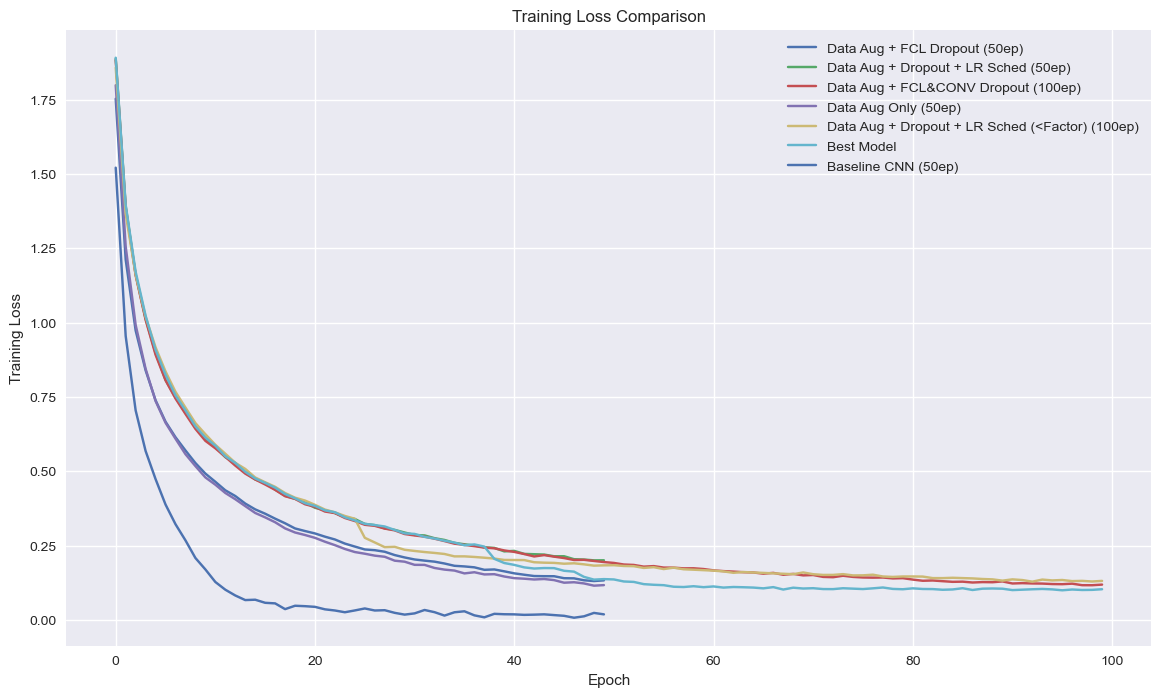

In [31]:
plt.style.use("seaborn-v0_8")
plt.figure(figsize=(14,8))

for name, logs in experiments.items():
    train_loss = logs['arr_0']
    plt.plot(train_loss, label=name)

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()

### Training Accuracy Comparison

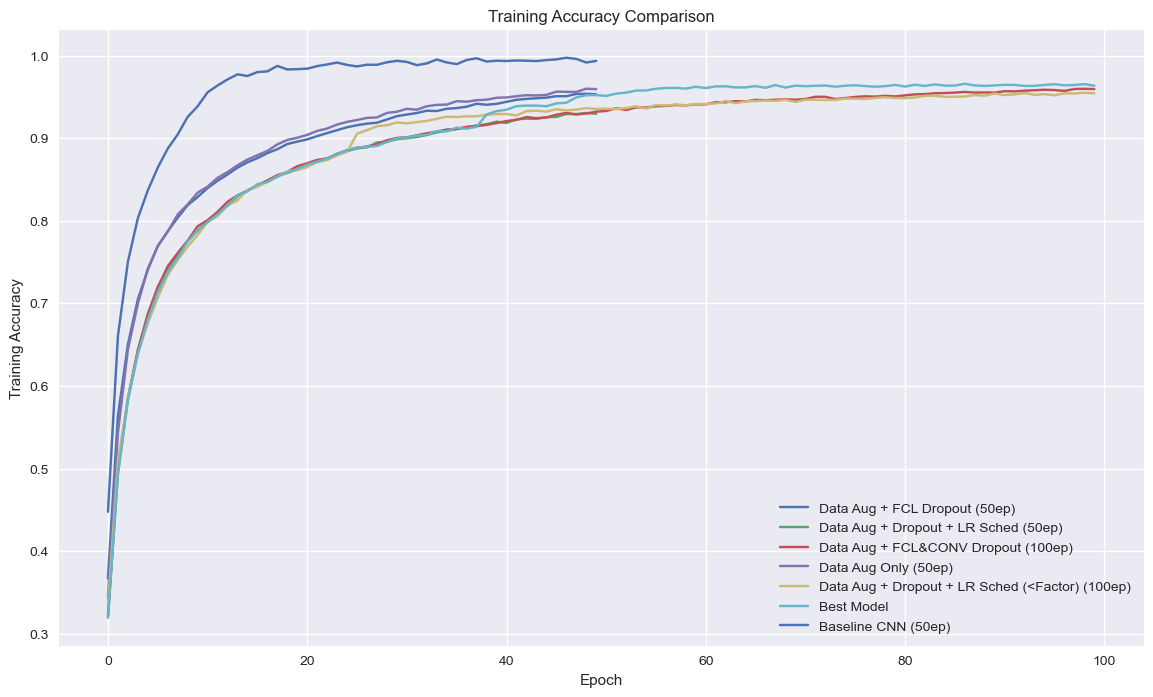

In [32]:
plt.style.use("seaborn-v0_8")
plt.figure(figsize=(14,8))

for name, logs in experiments.items():
    train_loss = logs['arr_1']
    plt.plot(train_loss, label=name)

plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.show()

### Validaion Accuracy Comparison

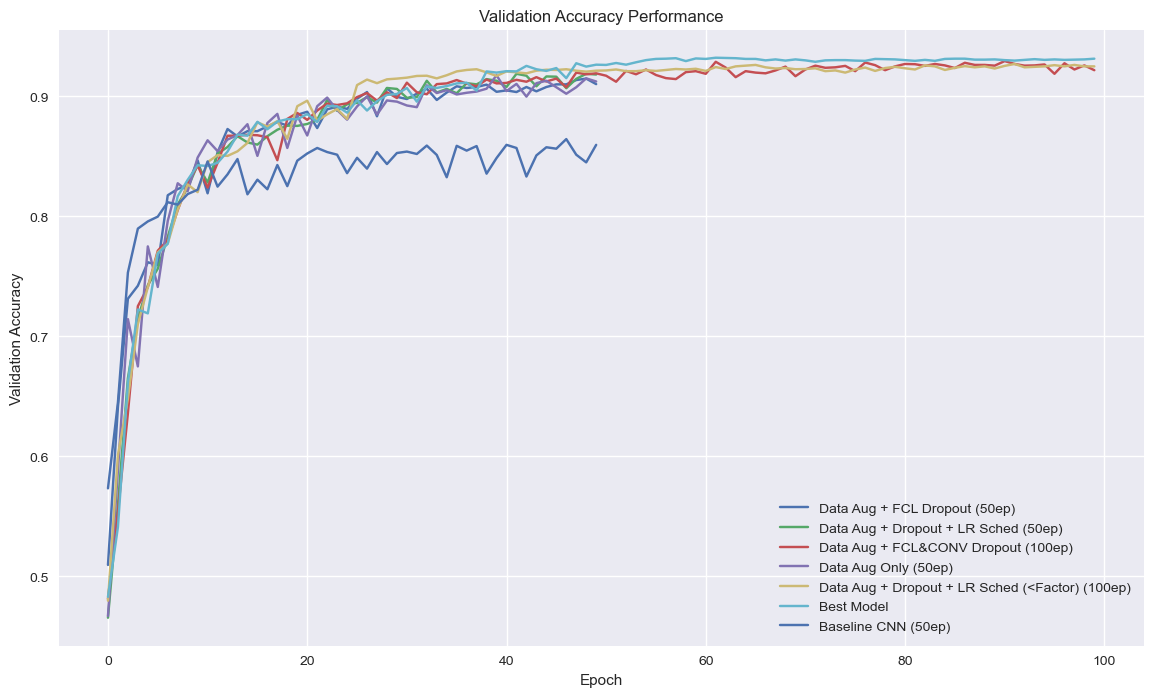

In [26]:
plt.style.use("seaborn-v0_8")
plt.figure(figsize=(14, 8))

for name, logs in experiments.items():
    test_accuracy = logs['arr_3']
    plt.plot(test_accuracy, label=name)

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Performance")
plt.legend()
plt.grid(True)
plt.show()

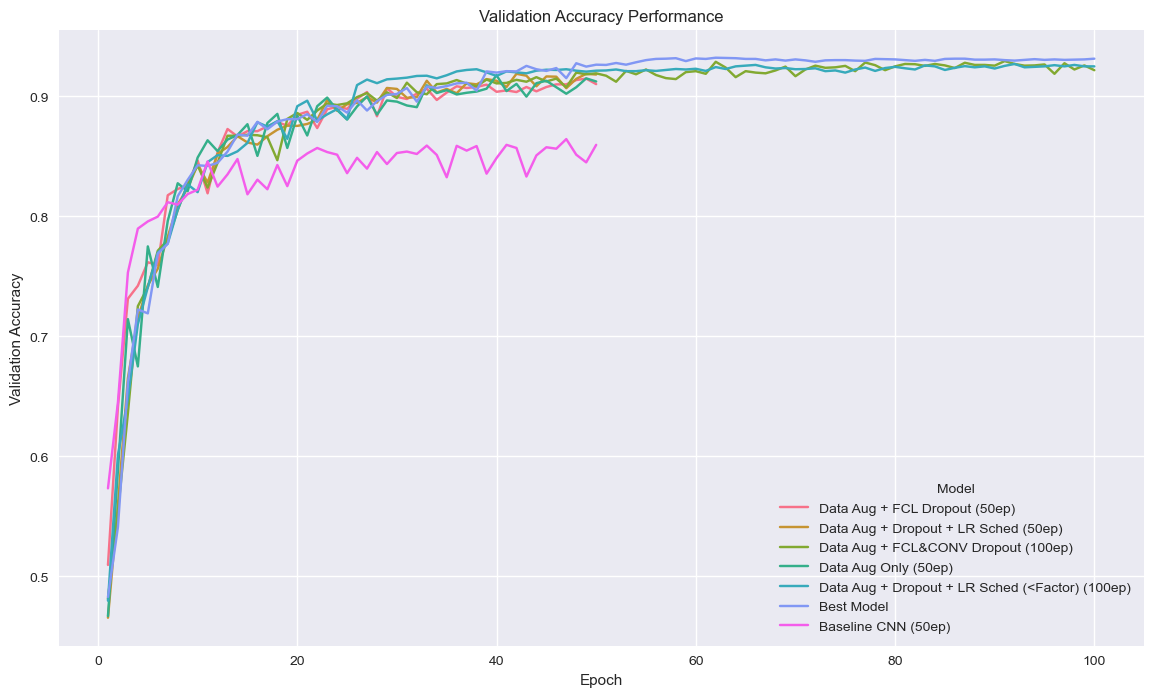

In [27]:
all_data = []
for name, logs in experiments.items():
    validation_acc = logs['arr_3']
    for epoch, acc in enumerate(validation_acc, start=1):
        all_data.append({"Epoch": epoch, "Validation Accuracy": acc, "Model": name})
df = pd.DataFrame(all_data)
plt.figure(figsize=(14,8))
sns.lineplot(data=df, x="Epoch", y="Validation Accuracy", hue="Model", markers="o")
plt.title("Validation Accuracy Performance")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()

### Validation Loss Comparison

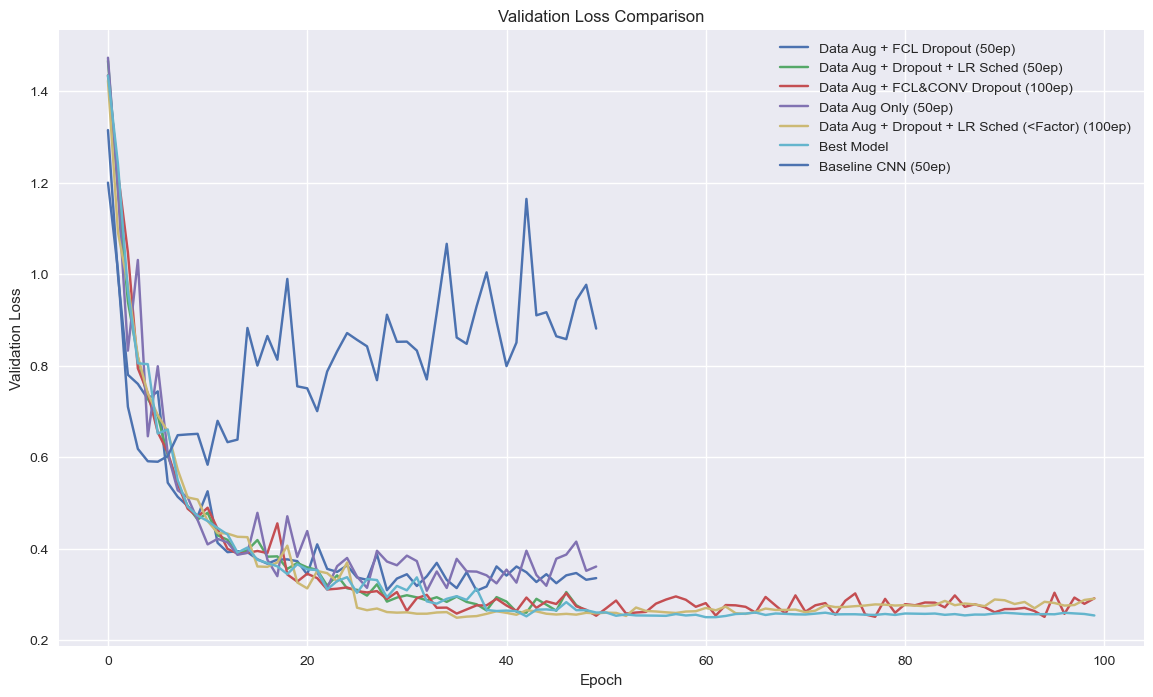

In [28]:
plt.style.use("seaborn-v0_8")
plt.figure(figsize=(14, 8))
for name, logs in experiments.items():
    test_accuracy = logs['arr_2']
    plt.plot(test_accuracy, label=name)

plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Validation Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()

### Test Accuracy Comparison

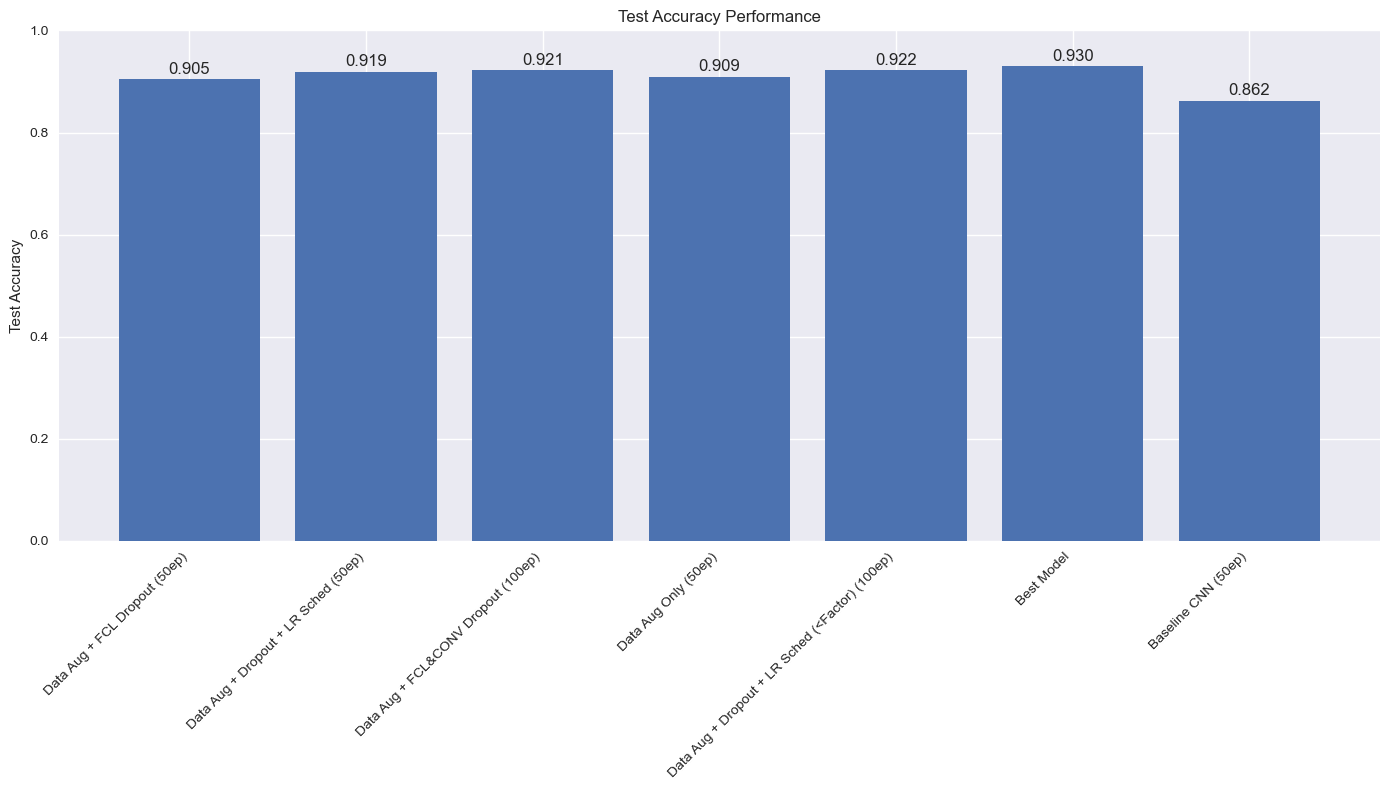

In [29]:
models = []
test_accuracy = []
for name, logs in experiments.items():
    models.append(name)
    test_accuracy.append(logs['arr_5'])
plt.figure(figsize=(14, 8))
bars = plt.bar(models, test_accuracy)
for bar in bars:
    y = bar.get_height()
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.3f}', ha='center', va='bottom', fontsize=12)
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Performance")
plt.xticks(ha="right", rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


### Model Generalisation - Validation Loss and Training Loss (Per Model)

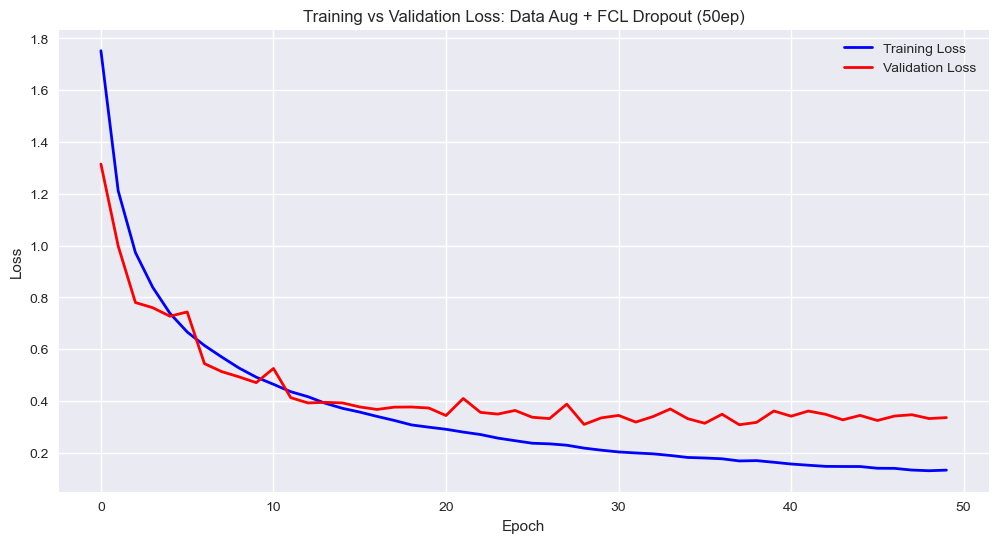

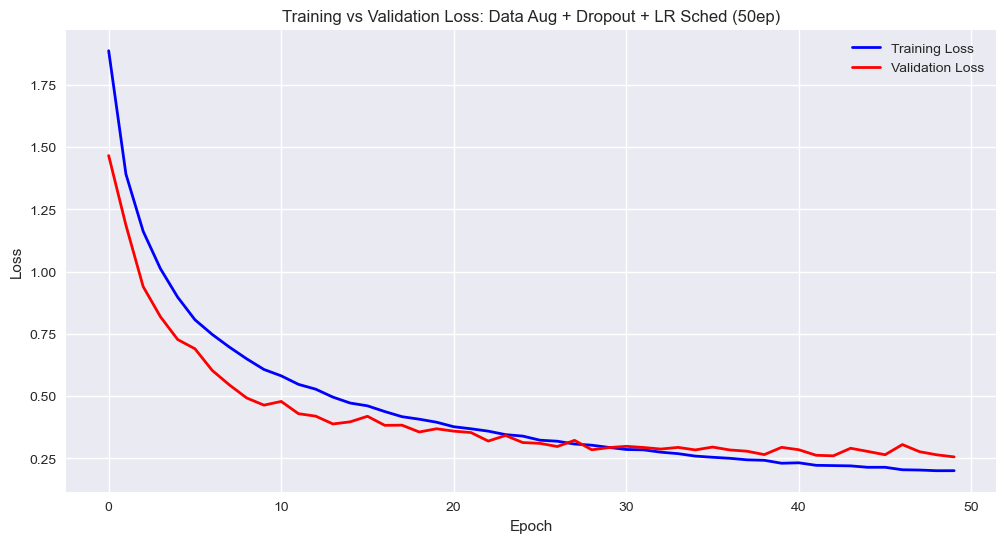

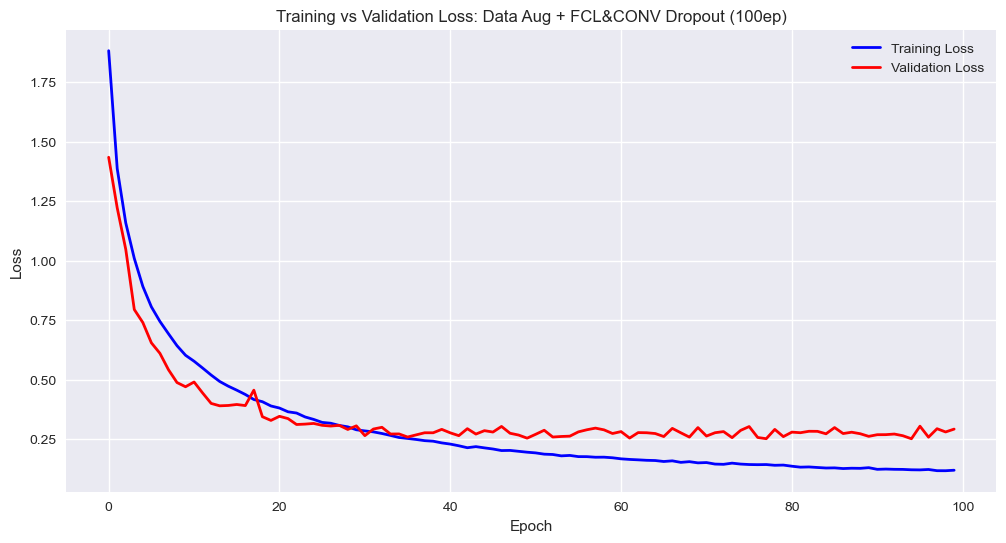

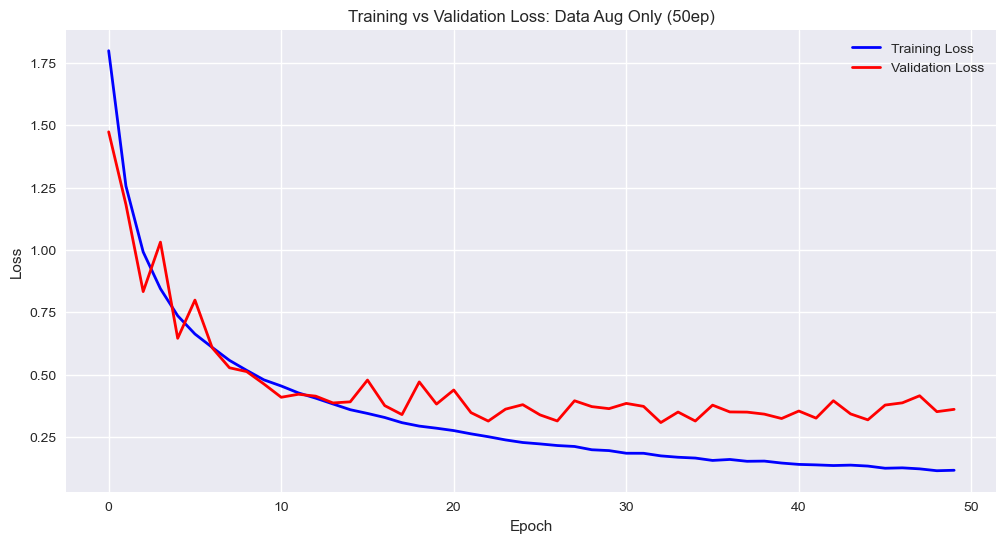

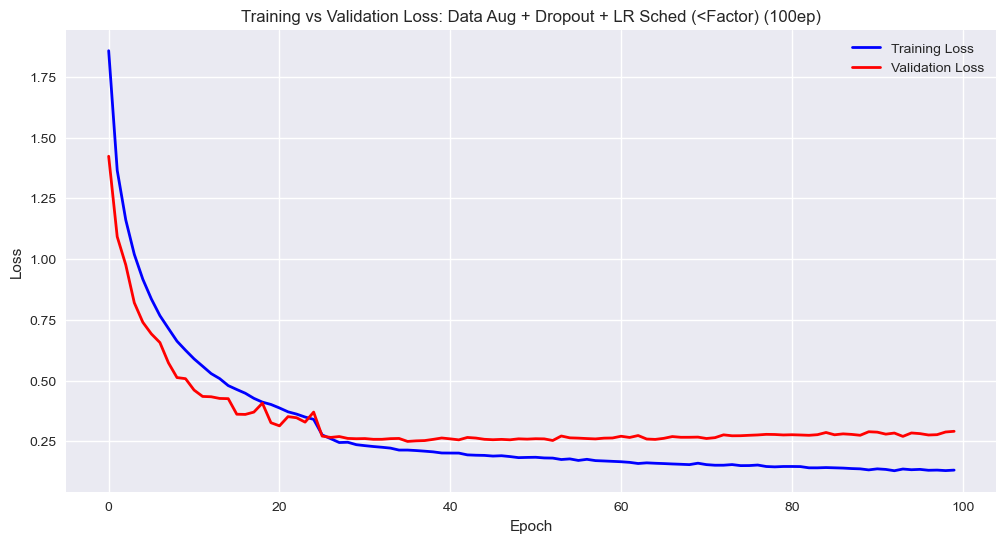

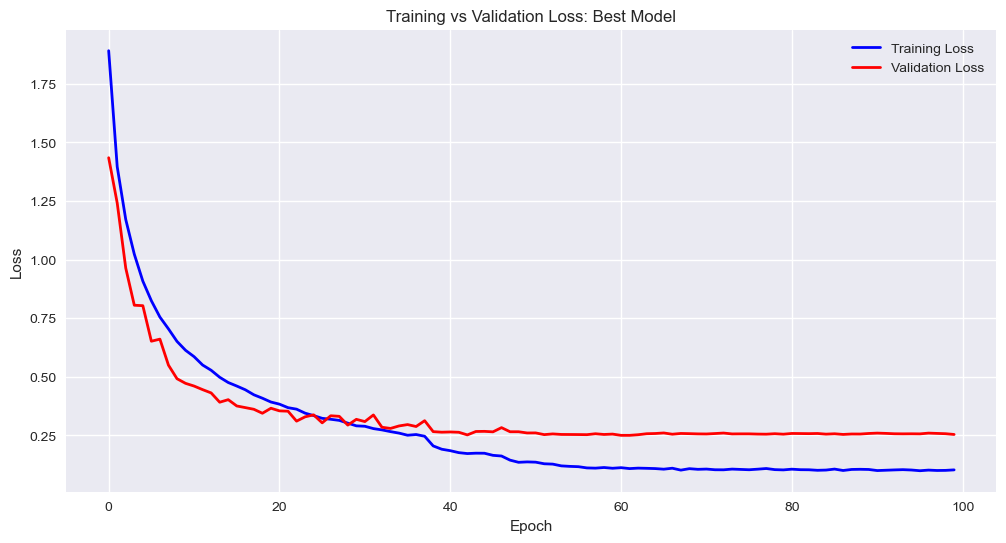

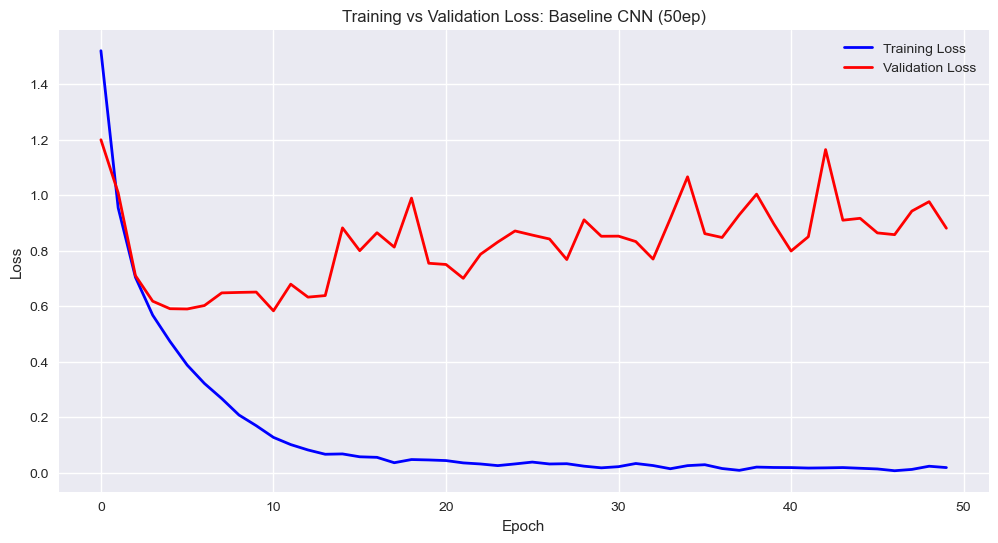

In [43]:
plt.style.use("seaborn-v0_8")
colours = ["Blue", "Red"]
for name, logs in experiments.items():
    training_loss = logs['arr_0']
    validation_loss = logs['arr_2']
    plt.figure(figsize=(12, 6))
    plt.plot(training_loss, label='Training Loss', linewidth=2, color=colours[0])
    plt.plot(validation_loss, label='Validation Loss', linewidth=2, color=colours[1])

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Training vs Validation Loss: {name}")
    plt.legend()
    plt.grid(True)
    plt.show()

### Data Augmentation Effect

#### Overfitting 

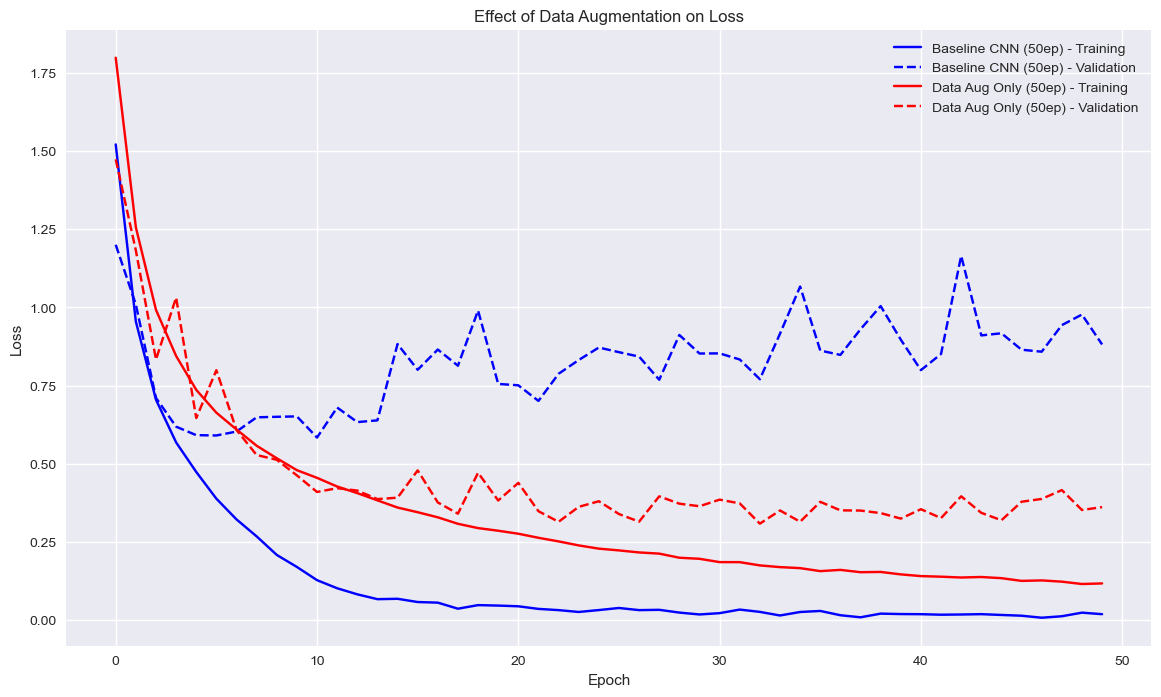

In [55]:
data_aug_added = [
    "Baseline CNN (50ep)",
    "Data Aug Only (50ep)"
]
colours = ["Blue", "Red"]
plt.figure(figsize=(14, 8))
for c, name in enumerate(data_aug_added):
    logs = experiments[name]
    training_loss = logs['arr_0']
    validation_loss = logs['arr_2']

    plt.plot(training_loss, label=f"{name} - Training", linestyle='-', color=colours[c])
    plt.plot(validation_loss, label=f"{name} - Validation", linestyle='--', color=colours[c])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Effect of Data Augmentation on Loss")
plt.legend()
plt.grid(True)
plt.show()


#### Validation Accuracy (Better on unseen data)

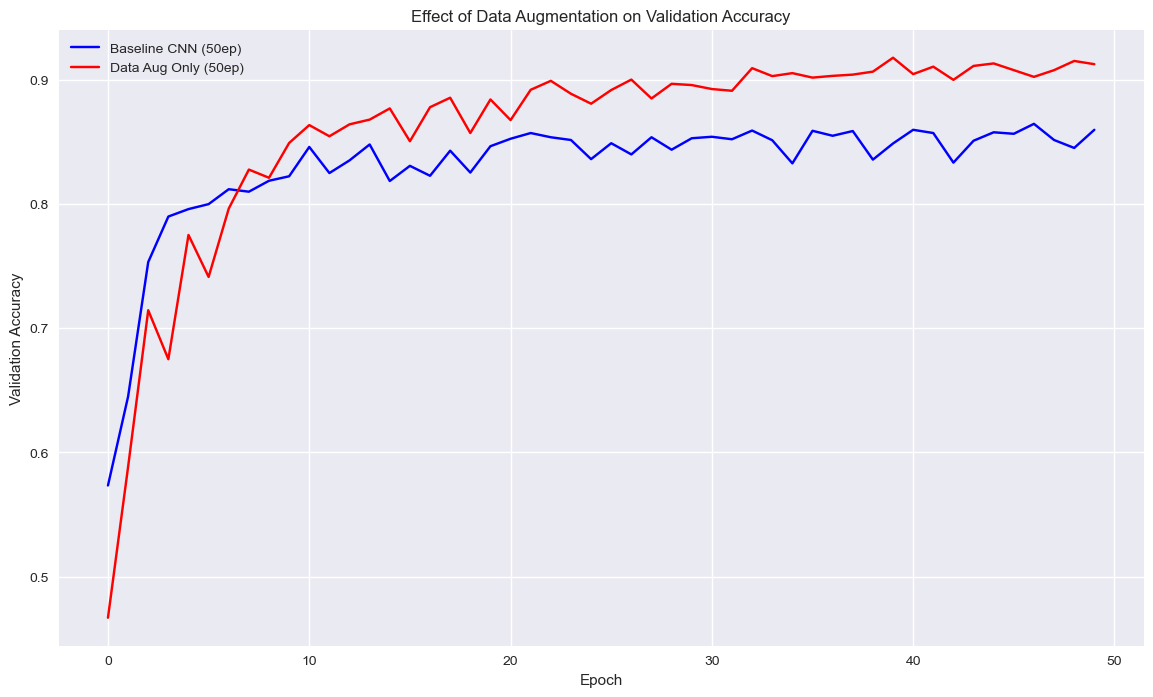

In [45]:
# We are performing better on data we have not seen yet
plt.figure(figsize=(14, 8))
for c, name in enumerate(data_aug_added):
    logs = experiments[name]
    validation_acc = logs['arr_3']
    plt.plot(validation_acc, label=name, color=colours[c])
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Effect of Data Augmentation on Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Dropout Effect

#### Validation Loss (Better Generalisation)

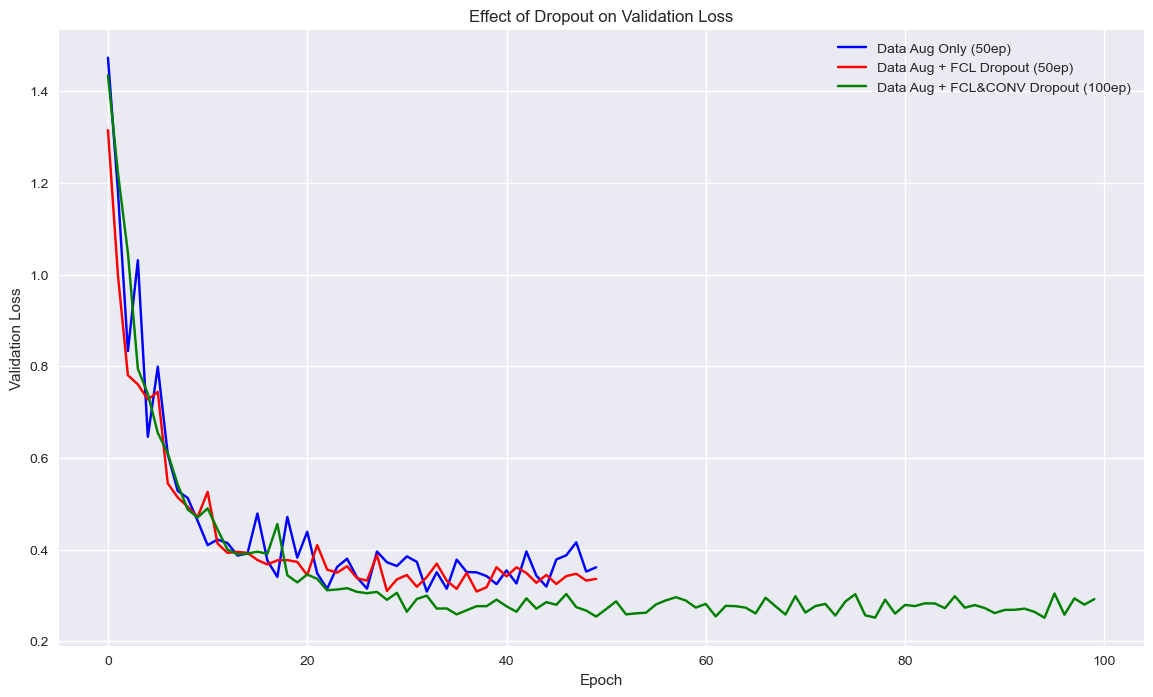

In [ ]:
# Base vs Dropout only at FCL + Dropout at FCL + Conv Layers
dropout_added_models = [
    "Data Aug Only (50ep)",
    "Data Aug + FCL Dropout (50ep)",
    "Data Aug + FCL&CONV Dropout (100ep)",
]
colours = ["Blue", "Red", "Green"]
plt.figure(figsize=(14, 8))
for c, name in enumerate(dropout_added_models):
    logs = experiments[name]
    validation_loss = logs['arr_2']
    plt.plot(validation_loss, label=name, color=colours[c])
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Effect of Dropout on Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

#### Validation Accuracy (More evidence of better generalisation)

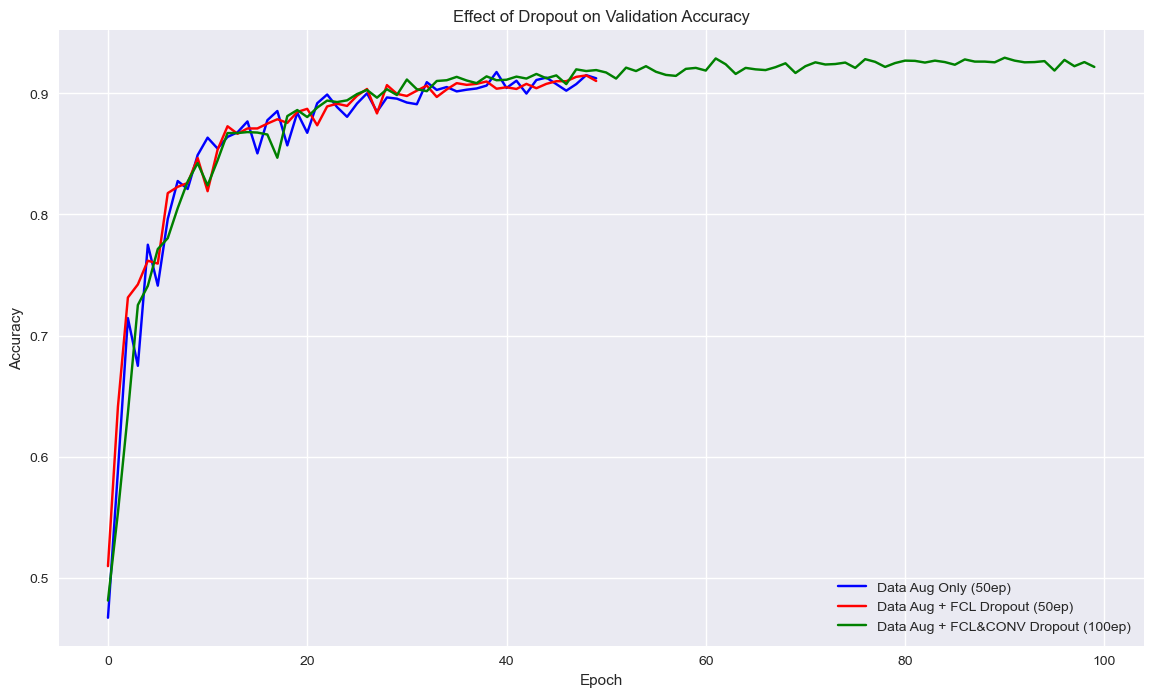

In [56]:
# Base vs Dropout only at FCL + Dropout at FCL + Conv Layers
dropout_added_models = [
    "Data Aug Only (50ep)",
    "Data Aug + FCL Dropout (50ep)",
    "Data Aug + FCL&CONV Dropout (100ep)",
]
colours = ["Blue", "Red", "Green"]
plt.figure(figsize=(14, 8))
for c, name in enumerate(dropout_added_models):
    logs = experiments[name]
    validation_acc = logs['arr_3']
    plt.plot(validation_acc, label=name, color=colours[c])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Effect of Dropout on Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Learning Rate Scheduler Effect

##### Immediate effect of just adding ReduceLearningRateOnPlateu Scheduler (No Scheduler fine tuning)

Training loss & Training Accuracy

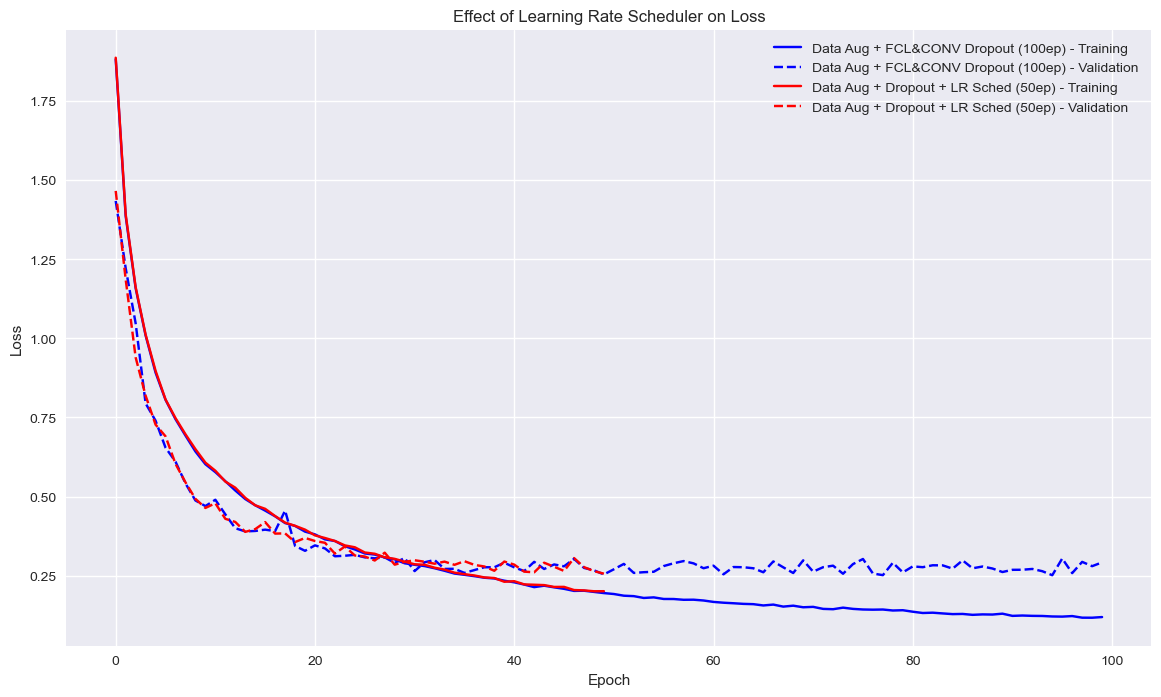

In [ ]:

immediately_adding_scheduler_models = [
    "Data Aug + FCL&CONV Dropout (100ep)",
    "Data Aug + Dropout + LR Sched (50ep)"
]
colours = ["Blue", "Red"]
plt.figure(figsize=(14, 8))
for c, name in enumerate(immediately_adding_scheduler_models):
    logs = experiments[name]
    training_loss = logs['arr_0']
    validation_loss = logs['arr_2']

    plt.plot(training_loss, label=f"{name} - Training", linestyle='-', color=colours[c])
    plt.plot(validation_loss, label=f"{name} - Validation", linestyle='--', color=colours[c])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Effect of Learning Rate Scheduler on Loss")
plt.legend()
plt.grid(True)
plt.show()


Validation Accuracy

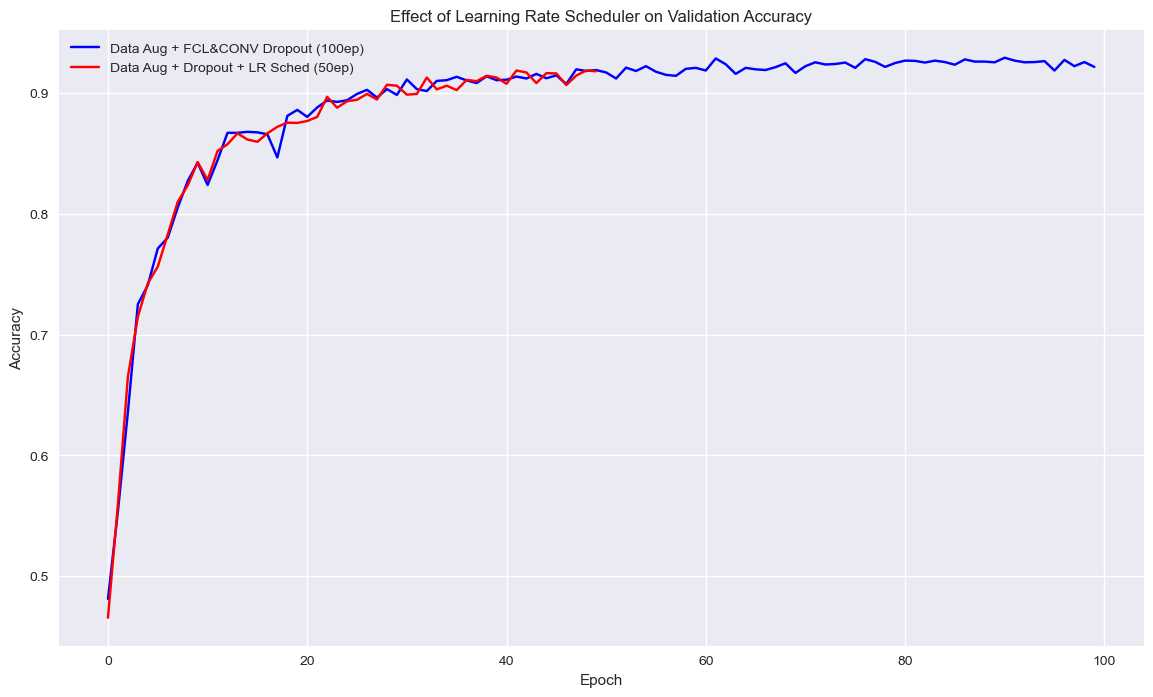

In [ ]:
plt.figure(figsize=(14, 8))
for c, name in enumerate(immediately_adding_scheduler_models):
    logs = experiments[name]
    validation_acc = logs['arr_3']
    plt.plot(validation_acc, label=name, color=colours[c])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Effect of Learning Rate Scheduler on Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### Tuning Scheduler Effect (continuously optimising hyperparams of the scheduler till best model)

##### Training & Validation Loss

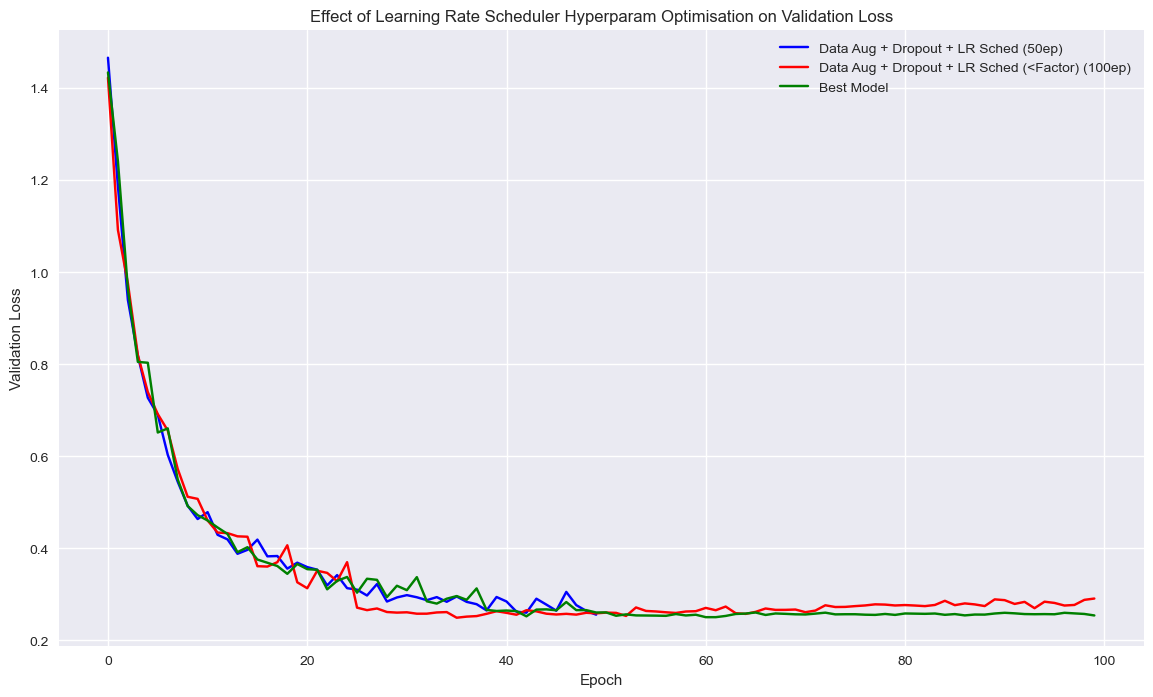

In [62]:

learning_rate_sched_models = [
    "Data Aug + Dropout + LR Sched (50ep)",
    "Data Aug + Dropout + LR Sched (<Factor) (100ep)",
    "Best Model"
]
colours = ["Blue", "Red", "Green"]
plt.figure(figsize=(14, 8))
for c, name in enumerate(learning_rate_sched_models):
    logs = experiments[name]
    validation_loss = logs['arr_2']
    plt.plot(validation_loss, label=name, color=colours[c])
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Effect of Learning Rate Scheduler Hyperparam Optimisation on Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


#### Validation Accuracy

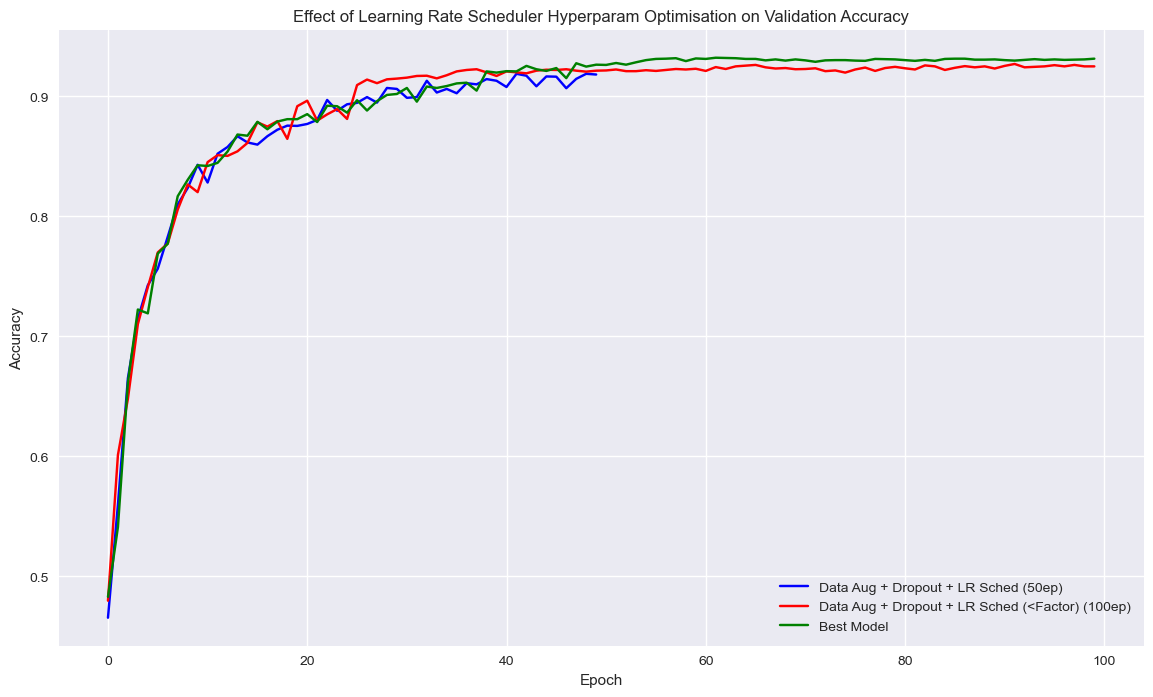

In [64]:
plt.figure(figsize=(14, 8))
for c, name in enumerate(learning_rate_sched_models):
    logs = experiments[name]
    validation_acc = logs['arr_3']
    plt.plot(validation_acc, label=name, color=colours[c])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Effect of Learning Rate Scheduler Hyperparam Optimisation on Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()